#### building Trial-Error for linear Regression

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#### create random function

In [8]:
x= 30*np.random.random((20,1))


# y = ax+b+ random noise

In [13]:
y =0.5*x+1+np.random.normal(size=x.shape)

#### build and fit Model

In [15]:
model= LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predict the Data

In [23]:
x_new= np.linspace(0,30,100)
y_new= model.predict(x_new[:,np.newaxis])

#### plot the result

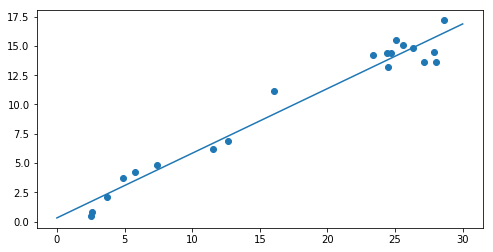

In [28]:
plt.figure(figsize=(8,4))
ax= plt.axes()
ax.scatter(x,y)

ax.plot(x_new,y_new)

In [34]:
'the model is {a}x+ {b}'.format(a= model.coef_, b= model.intercept_)

'the model is [[0.55208583]]x+ [0.31278658]'

## Building Regularization to prevent Overfitting in Model Building

In [38]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean
import pandas as pd

In [40]:
data= pd.read_csv('kc_house_data.csv')
dropColumns = ['id', 'date', 'zipcode'] 
data = data.drop(dropColumns, axis = 1) 

In [57]:
data= data.dropna()

In [58]:
y=data['price']
X= data.drop(columns='price')

#### split data into train and test 

In [59]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25)

## building and evaluating several models

### 1) linear Regression

In [60]:
linear_model= LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

the result score for the linear regression model

In [62]:
linear_model.score(X_test,y_test)

0.6770351707886566

## 2) Ridge(L2) Regression

#### as well as creating cross validation result to lower the bias and tackle the data distribution heterogenity

#### this loop is to compute the different values of cross validation score for different value of alpha

In [68]:
cross_val= []

alpha= []

for i in range(1,9):
    ridgeModel= Ridge(alpha=i*0.25)
    ridgeModel.fit(X_train,y_train)
    ## adding cross validation score
    scores= cross_val_score(ridgeModel,X,y,cv=10)
    average_score= mean(scores)*100
    cross_val.append(average_score)
    alpha.append(i*0.25)

In [69]:
alpha

[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]

In [73]:
for a in range(0,len(alpha)):
    print(str(alpha[a])  +' : '+ str(cross_val[a]))

0.25 : 69.09015837671014
0.5 : 69.09033468066409
0.75 : 69.09049125083853
1.0 : 69.0906282899928
1.25 : 69.09074599856247
1.5 : 69.09084457469041
1.75 : 69.09092421425656
2.0 : 69.09098511090886


### the best value is the one with the highest cross validation score, which with the alpha 2.0

In [74]:
ridgeModel_choose= Ridge(alpha=2)
ridgeModel_choose.fit(X_train,y_train)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

### the result on the Test data

In [76]:
ridgeModel_choose.score(X_test,y_test)

0.677159871717667

## 3) Lasso(L1) Regression

In [78]:
# List to maintain the cross-validation scores 
cross_val_scores_lasso = [] 
  
# List to maintain the different values of Lambda 
Lambda = [] 
  
# Loop to compute the cross-validation scores 
for i in range(1, 9): 
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925) 
    lassoModel.fit(X_train, y_train) 
    scores = cross_val_score(lassoModel, X, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score) 
    Lambda.append(i * 0.25) 
##Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i])) 

0.25 : 69.08996762461638
0.5 : 69.08997309354584
0.75 : 69.08997853389323
1.0 : 69.08998394768221
1.25 : 69.08998932707658
1.5 : 69.0899946794557
1.75 : 69.09000001882954
2.0 : 69.09000531192427


### we get the best with the 2 as alpha

In [80]:
lassomodel_choose= Lasso(alpha=2,tol=0.09)
lassomodel_choose.fit(X_train,y_train)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.09, warm_start=False)

In [82]:
print(lassomodel_choose.score(X_test, y_test)) 

0.6770407812530752


### 4) Comparing and visualizing the Result

In [84]:
models= ['Linear Regression','Ridgre Regression','Lasso Regression']
scores= [linear_model.score(X_test,y_test),
        ridgeModel_choose.score(X_test,y_test),
        lassomodel_choose.score(X_test,y_test)]

In [88]:
mapping= {}
mapping['LinearRegression']= linear_model.score(X_test,y_test)
mapping['Ridge Regression']= ridgeModel_choose.score(X_test,y_test)
mapping['Lasso Regression']= lassomodel_choose.score(X_test,y_test)

In [89]:
for key, val in mapping.items(): 
    print(str(key)+' : '+str(val)) 

LinearRegression : 0.6770351707886566
Ridge Regression : 0.677159871717667
Lasso Regression : 0.6770407812530752


### plotting the Bar

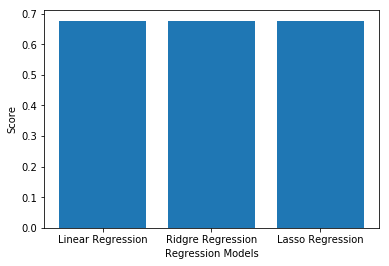

In [95]:
plt.bar(models,scores)
plt.xlabel('Regression Models') 
plt.ylabel('Score') 
plt.show()

## Evaluation 

## now we checking the R2 or MSE score


In [98]:
from sklearn.metrics import r2_score
from sklearn import metrics

### 1. linear Regression 

In [99]:
y_pred_lin= linear_model.predict(X_test)

R-2 SCore value

In [100]:
r2_score(y_test,y_pred_lin)

0.6770351707886566

Mean absolute error

In [102]:
metrics.mean_absolute_error(y_test,y_pred_lin)

127652.48969699496

mean squared error

In [104]:
metrics.mean_squared_error(y_test,y_pred_lin)

37893532536.9345

#### summary

In [105]:
print("R-Square Value",r2_score(y_test,y_pred_lin))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred_lin))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred_lin))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin)))

R-Square Value 0.6770351707886566


mean_absolute_error : 127652.48969699496


mean_squared_error :  37893532536.9345


root_mean_squared_error :  194662.61206748075


### 2. Ridge (L2) Regression evaluation 

In [125]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred_ridge = ridgereg.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred_ridge))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred_ridge))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred_ridge))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))

R-Square Value 0.6770351707886907


mean_absolute_error : 127652.48969698243


mean_squared_error :  37893532536.9305


root_mean_squared_error :  194662.61206747047


## 3. Lasso  Regression Evaluation 

In [128]:
y_pred_lassso = lassomodel_choose.predict(X_test)
# calculate MAE, MSE, RMSE
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred_lassso))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred_lassso))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred_lassso))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred_lassso)))

R-Square Value 0.6770407812530752


mean_absolute_error : 127650.2959133823


mean_squared_error :  37892874259.94343


root_mean_squared_error :  194660.92124497774


### visualize the Evaluation Result
#### 1. R2 Score

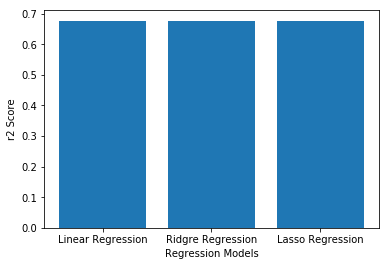

In [130]:
models= ['Linear Regression','Ridgre Regression','Lasso Regression']
scores= [r2_score(y_test,y_pred_lin),
         r2_score(y_test,y_pred_ridge),
         r2_score(y_test,y_pred_lassso)
]
plt.bar(models,scores)
plt.xlabel('Regression Models') 
plt.ylabel('r2 Score') 
plt.show()

#### 2)Mean absolute error

Text(0.5,1,'Mean Absolute Error')

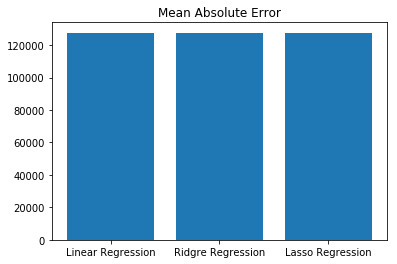

In [139]:
scores= [
    metrics.mean_absolute_error(y_test,y_pred_lin),
    metrics.mean_absolute_error(y_test,y_pred_ridge),
    metrics.mean_absolute_error(y_test,y_pred_lassso)
    
]
plt.bar(models,scores)
plt.title('Mean Absolute Error')

### 3) Mean Squared error

In [132]:
scores_mse= [metrics.mean_squared_error(y_test,y_pred_lin),
             metrics.mean_squared_error(y_test,y_pred_ridge),
             metrics.mean_squared_error(y_test,y_pred_lassso)
            ]
             

Text(0.5,1,'Mean Squared error')

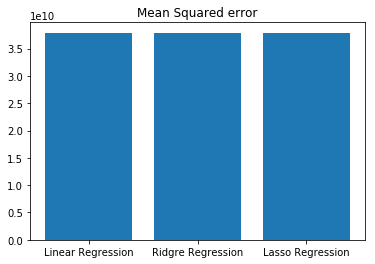

In [137]:
plt.bar(models,scores_mse)
plt.title('Mean Squared error')

### 4) Root Mean squared error

Text(0.5,1,'Root Mean Squared error')

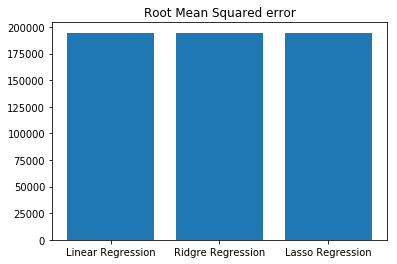

In [136]:
scores_rmse= [
    np.sqrt(metrics.mean_squared_error(y_test,y_pred_lin)),
    np.sqrt(metrics.mean_squared_error(y_test,y_pred_ridge)),
    np.sqrt(metrics.mean_squared_error(y_test,y_pred_lassso))
    
    
]
plt.bar(models,scores_rmse)
plt.title('Root Mean Squared error')